<a href="https://colab.research.google.com/github/KARENCMP82/Python/blob/main/BENCHMARK_FROM_SCRATCH_PARTE_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import numpy as np
import pandas as pd  # Importa la biblioteca Pandas y la asigna al alias 'pd'

In [116]:
from google.colab import drive
drive.mount('/content/drive')

df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ejercicios/ts_kaggle_train.csv")

#ts_kaggle_train.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
#DATA_PATH = "/Users/nicolaepopescul/code/nuclio/time_series/data"

In [118]:
#df = pd.read_csv(DATA_PATH + "/ts_kaggle_train.csv", index_col = 0)

In [119]:
df["unique_id"].nunique()

426

In [120]:
df.groupby(["date"])["monthly_sales"].sum()

,monthly_sales
date,
2013-01-31,2303.0
2013-02-28,2218.0
2013-03-31,2782.0
2013-04-30,2374.0
2013-05-31,2665.0
2013-06-30,2961.0
2013-07-31,3118.0
2013-08-31,3098.0
2013-09-30,3118.0


In [121]:
df.head()

,Unnamed: 0,date,unique_id,city_id,shop_id,item_category_id,item_id,monthly_average_price,monthly_sales
0,0,2013-01-31,12_11365,16,12,9,11365,1511.512626,30.0
1,1,2013-01-31,12_11369,16,12,9,11369,572.715278,30.0
2,2,2013-01-31,12_11370,16,12,9,11370,699.776786,30.0
3,3,2013-01-31,12_11373,16,12,9,11373,548.900000,6.0
4,4,2013-01-31,12_12231,16,12,49,12231,350.000000,3.0


In [122]:
# Transformaciones de variables
# Imputación de nulos
# Crear un pocas variables
# Train Test Split
# Entrenar el modelo
# Sacar la predicción

In [123]:
df.describe().round(2)

,Unnamed: 0,city_id,shop_id,item_category_id,item_id,monthly_average_price,monthly_sales
count,14484.00,14484.00,14484.00,14484.00,14484.00,13262.00,13756.00
mean,7241.50,10.83,31.97,39.36,8626.43,916.09,7.34
std,4181.31,6.23,15.24,20.44,5905.27,820.95,7.92
min,0.00,0.00,3.00,2.00,32.00,4.93,0.00
25%,3620.75,7.00,22.00,30.00,4248.00,299.00,2.00
50%,7241.50,7.00,31.00,35.00,6457.00,649.00,5.00
75%,10862.25,16.00,44.00,55.00,12551.00,1149.00,9.00
max,14483.00,23.00,59.00,83.00,22088.00,9305.12,30.00


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14484 entries, 0 to 14483
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             14484 non-null  int64  
 1   date                   14484 non-null  object 
 2   unique_id              14484 non-null  object 
 3   city_id                14484 non-null  int64  
 4   shop_id                14484 non-null  int64  
 5   item_category_id       14484 non-null  int64  
 6   item_id                14484 non-null  int64  
 7   monthly_average_price  13262 non-null  float64
 8   monthly_sales          13756 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 1018.5+ KB


In [125]:
df["date"] = pd.to_datetime(df["date"], format = "%Y-%m-%d")

In [126]:
import seaborn as sns

In [127]:
df.isnull().sum()

,0
Unnamed: 0,0
date,0
unique_id,0
city_id,0
shop_id,0
item_category_id,0
item_id,0
monthly_average_price,1222
monthly_sales,728


In [128]:
pt = df.pivot_table(
    index = "date",
    columns = "unique_id",
    values = "monthly_sales",
    aggfunc = lambda value: value
).isnull()

<Axes: xlabel='unique_id', ylabel='date'>

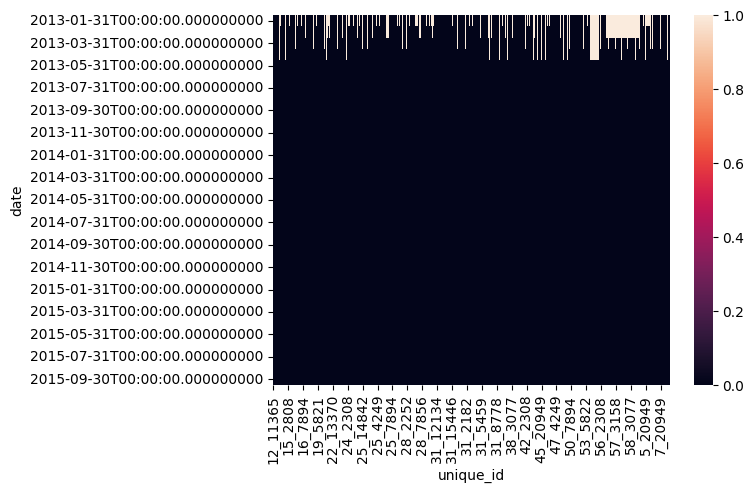

In [129]:
sns.heatmap(pt)

In [130]:
df

,Unnamed: 0,date,unique_id,city_id,shop_id,item_category_id,item_id,monthly_average_price,monthly_sales
0,0,2013-01-31,12_11365,16,12,9,11365,1511.512626,30.0
1,1,2013-01-31,12_11369,16,12,9,11369,572.715278,30.0
2,2,2013-01-31,12_11370,16,12,9,11370,699.776786,30.0
3,3,2013-01-31,12_11373,16,12,9,11373,548.900000,6.0
4,4,2013-01-31,12_12231,16,12,49,12231,350.000000,3.0
...,...,...,...,...,...,...,...,...,...
14479,14479,2015-10-31,7_5822,21,7,35,5822,NaN,NaN
14480,14480,2015-10-31,7_6185,21,7,30,6185,NaN,NaN
14481,14481,2015-10-31,7_6497,21,7,28,6497,NaN,NaN
14482,14482,2015-10-31,7_7856,21,7,28,7856,NaN,NaN


<Axes: xlabel='monthly_sales'>

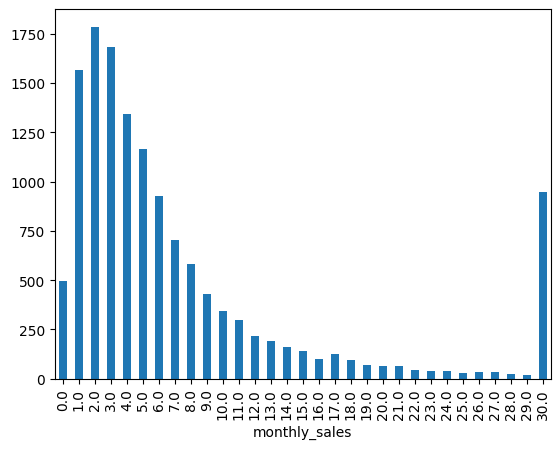

In [131]:
(
    df
    ["monthly_sales"]
    .value_counts()
    .sort_index()
    .plot(kind = "bar")
)

In [132]:
df["monthly_sales_nulos"] = df["monthly_sales"].replace({0:np.nan})

In [133]:
pt = df.pivot_table(
    index = "date",
    columns = "unique_id",
    values = "monthly_sales_nulos",
    aggfunc = lambda value: value
).isnull()

<Axes: xlabel='unique_id', ylabel='date'>

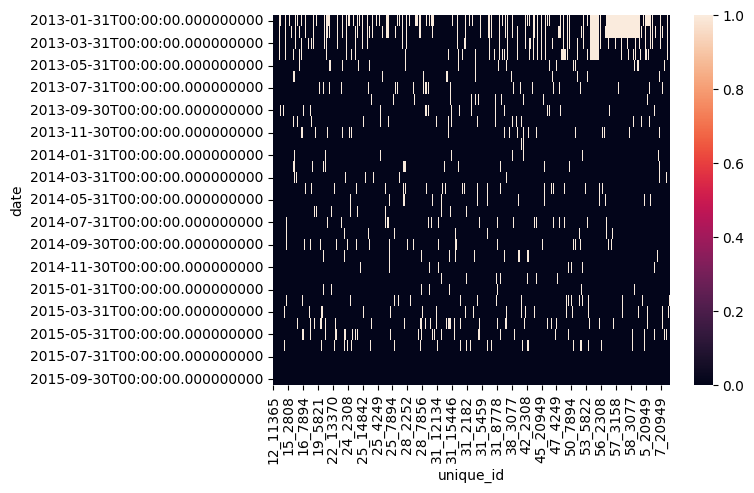

In [134]:
sns.heatmap(pt)

In [135]:
df["monthly_sales"] = df["monthly_sales"].fillna(0)

In [136]:
sample_ts = "31_4249"

ts = df[df["unique_id"] == sample_ts]

ts = ts[["date", "monthly_sales", "monthly_average_price"]]

ts["monthly_average_price_ff"] = ts["monthly_average_price"].ffill()

ts["monthly_average_price_bf"] = ts["monthly_average_price"].bfill()

ts["monthly_average_price_ff_bf"] = ts["monthly_average_price"].ffill().bfill()

ts["monthly_average_price_int"] = ts["monthly_average_price"].interpolate()

ts.head()

,date,monthly_sales,monthly_average_price,monthly_average_price_ff,monthly_average_price_bf,monthly_average_price_ff_bf,monthly_average_price_int
5666,2013-01-31,2.0,1899.0000,1899.0000,1899.0000,1899.0000,1899.0000
5743,2013-02-28,5.0,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000
5820,2013-03-31,6.0,1013.4160,1013.4160,1013.4160,1013.4160,1013.4160
5897,2013-04-30,10.0,1598.9000,1598.9000,1598.9000,1598.9000,1598.9000
5974,2013-05-31,8.0,1598.9375,1598.9375,1598.9375,1598.9375,1598.9375


In [137]:
df.drop("monthly_sales_nulos", axis = 1, inplace = True)

In [138]:
df.isnull().sum()

,0
Unnamed: 0,0
date,0
unique_id,0
city_id,0
shop_id,0
item_category_id,0
item_id,0
monthly_average_price,1222
monthly_sales,0


In [139]:
# Imputa los valores nulos en la columna 'monthly_average_price' usando ffill y bfill, y luego cuenta cuántos nulos quedan.
df["monthly_average_price"].ffill().bfill().isnull().sum()


np.int64(0)

In [140]:
df["unique_id"].nunique()

426

In [141]:
# SUPER SUPER MAL
# df["monthly_average_price"] = df["monthly_average_price"].ffill().bfill()

In [142]:
gbdf = df.groupby(["unique_id"])

In [143]:
gbdf.get_group(("12_11369"))["monthly_sales"]

<ipython-input-143-5b71b4b341b6>:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  gbdf.get_group(("12_11369"))["monthly_sales"]


,monthly_sales
1,30.0
8,30.0
15,30.0
22,30.0
29,17.0
36,21.0
43,18.0
50,30.0
57,30.0
64,30.0


In [144]:
series_imputed = df.groupby(["unique_id"])["monthly_average_price"].ffill().bfill()

In [145]:
# pd.concat([df, series_imputed])

In [146]:
# Crea una nueva columna 'monthly_average_price_imputed' en el DataFrame 'df' llenando los valores faltantes (NaN) en la columna 'monthly_average_price' para cada serie de tiempo individual,
# agrupando los datos por 'unique_id' y aplicando una combinación de forward fill (ffill) y backward fill (bfill).
df["monthly_average_price_imputed"] = df.groupby(["unique_id"])["monthly_average_price"].transform(
    lambda series: series.ffill().bfill()
)

In [147]:
df[df["unique_id"] == "7_5822"]

,Unnamed: 0,date,unique_id,city_id,shop_id,item_category_id,item_id,monthly_average_price,monthly_sales,monthly_average_price_imputed
14083,14083,2013-01-31,7_5822,21,7,35,5822,999.000000,8.0,999.000000
14095,14095,2013-02-28,7_5822,21,7,35,5822,1049.000000,8.0,1049.000000
14107,14107,2013-03-31,7_5822,21,7,35,5822,1040.250000,8.0,1040.250000
14119,14119,2013-04-30,7_5822,21,7,35,5822,1049.000000,6.0,1049.000000
14131,14131,2013-05-31,7_5822,21,7,35,5822,1022.750000,4.0,1022.750000
14143,14143,2013-06-30,7_5822,21,7,35,5822,1049.000000,2.0,1049.000000
14155,14155,2013-07-31,7_5822,21,7,35,5822,1049.000000,8.0,1049.000000
14167,14167,2013-08-31,7_5822,21,7,35,5822,1049.000000,12.0,1049.000000
14179,14179,2013-09-30,7_5822,21,7,35,5822,1049.000000,8.0,1049.000000
14191,14191,2013-10-31,7_5822,21,7,35,5822,1014.000000,4.0,1014.000000


In [148]:
# Transformaciones de variables
# Imputación de nulos

# Crear un pocas variables

# Train Test Split
# Entrenar el modelo
# Sacar la predicción

In [149]:
# Corregido el nombre de la columna
df.drop(["monthly_average_price", "monthly_saled_imputed"], axis=1, inplace=True)

KeyError: "['monthly_saled_imputed'] not found in axis"

In [ ]:
df.rename(columns = {"monthly_average_price_imputed":"monthly_average_price"}, inplace = True)

In [ ]:
df.head()

In [ ]:
# implementar la lógica (sample)
# refactorizar
# optimizar

In [ ]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

In [ ]:
df.head()

In [ ]:
# RESAMPLE
df.set_index("date").resample("w")["monthly_sales"].sum()

In [ ]:
(
    df
    .groupby(["date", "item_id"])
    ["monthly_sales"]
    .sum()
    .head()
)

In [ ]:
gbdf = (
    df
    .set_index("date")
    .groupby(["item_id"])
    .resample("M")
    ["monthly_sales"]
    .sum()
    .reset_index()
)

gbdf["monthly_sales_lag1"] = gbdf.groupby(["item_id"])["monthly_sales"].transform(
    lambda series: series.shift(1)
)

gbdf